In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_FC_PREP_0522.csv')
df['POD'] = pd.to_datetime(df['POD'])

df.head()
df.info()
print(f'Dataset size: {df.shape}')

,POD,RATE
0,2005-07-19,2200.0
1,2005-07-20,2250.0
2,2005-07-21,2300.0
3,2005-07-22,2280.0
4,2005-07-23,2260.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     6375 non-null   datetime64[ns]
 1   RATE    6375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.7 KB
Dataset size: (6375, 2)


In [31]:
df_after = pd.read_csv('CR_FC_PREP_23.csv')
df_after ['POD'] = pd.to_datetime(df_after ['POD'])

df_after .head()
df_after .info()
print(f'Dataset size: {df_after .shape}')

,POD,RATE
0,2023-01-01,4228.57
1,2023-01-02,4250.00
2,2023-01-03,2800.00
3,2023-01-04,2800.00
4,2023-01-05,2800.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     52 non-null     datetime64[ns]
 1   RATE    52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 960.0 bytes
Dataset size: (52, 2)


In [32]:
def FindANOMALY(df, df_after):
    # # Normalize the data using StandardScaler
    # scaler = StandardScaler()
    # df['RATE'] = scaler.fit_transform(df[['RATE']])

    # Isolation Forest Algo
    clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, random_state=42)

    # Train the algorithm
    clf.fit(df[['RATE']])

    # Predict anomalies
    df['ANOMALY'] = clf.predict(df[['RATE']])

    # Create a new dataframe for the anomalies
    is_anomaly = df[df['ANOMALY'] == -1].reset_index(drop=True)

    # Plot the data
    plt.plot(df['POD'], df['RATE'], color='blue', label='All Rates')
    plt.plot(is_anomaly['POD'], is_anomaly['RATE'], color='red', label='Anomaly Rates')
    plt.plot(df_after['POD'], df_after['RATE'], color='green', label='Current Rates')

    # Add axis labels and legend
    plt.xlabel('Date')
    plt.ylabel('Rate')
    plt.legend()

    # Show the plot
    plt.show()

    # Print values
    print(df)
    print(is_anomaly)

c:\Users\it1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


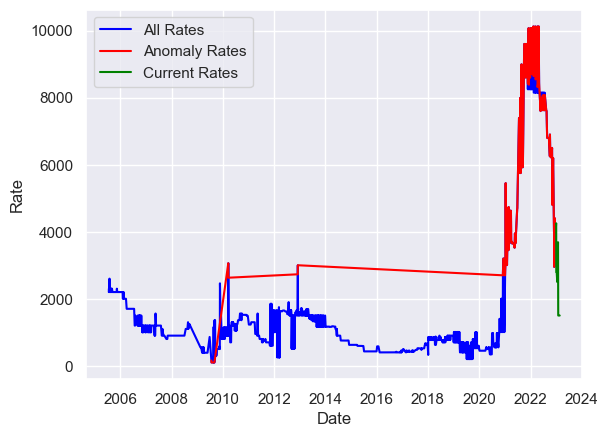

            POD     RATE  ANOMALY
0    2005-07-19  2200.00        1
1    2005-07-20  2250.00        1
2    2005-07-21  2300.00        1
3    2005-07-22  2280.00        1
4    2005-07-23  2260.00        1
...         ...      ...      ...
6370 2022-12-27  4121.43       -1
6371 2022-12-28  4142.86       -1
6372 2022-12-29  4164.29       -1
6373 2022-12-30  4185.71       -1
6374 2022-12-31  4207.14       -1

[6375 rows x 3 columns]
           POD     RATE  ANOMALY
0   2009-07-19   158.46       -1
1   2009-07-20   129.23       -1
2   2009-07-21   100.00       -1
3   2009-07-22   100.00       -1
4   2009-07-23   100.00       -1
..         ...      ...      ...
626 2022-12-27  4121.43       -1
627 2022-12-28  4142.86       -1
628 2022-12-29  4164.29       -1
629 2022-12-30  4185.71       -1
630 2022-12-31  4207.14       -1

[631 rows x 3 columns]


In [33]:
FindANOMALY(df, df_after)